# Kaggle March Madness (Stage 1) - Data Preparation

In this section we will explore our data further and go beyond basic descriptions. We'll verify the data quality and join our base datasets together. In the next notebook we will begin our feature engineering. 

## Summary from Data Understanding

Project Goals: submit predicted probabilities that the team with the lower id beats the team with the higher id.

* Seasons are denoted by their ending year 
    * I.E. season 2021-2022 will show 2022
    
Section 1: Teams

* 378 teams in dataset 
    * current 358 teams in division 1
        * does this need to be reconciled?

Teams Dataframe: 
* 4 Columns
    * TeamID,TeamName,FirstD1Season,LastD1Season
        * Team ID = number between 1000-1999
        * TeamName = abreviated team name (MAX len = 16)
        * FirstD1Season = first year of play in division 1
        * LastD1Season = last year of play in division 1
             * Note: This will help us eliminate or show a probablity of 0 if a team is no longer division 1


Seasons Dataframe:
* 6 Columns
    * Season,DayZero,RegionW, RegionX, Region Y, Region Z
        * Season = Season Year
        * DayZero = Start Date of Season
        * Region W,X,Y,Z - denotes conference for final four teams 
            * Whichever team comes first alphabetically will be given the variable W
                * Whichever team plays W will be given the variable X
            * Of the remaining two teams, whichever team comes first alphabetically will be given the variable Y
                * Whichever team plays Y will be give nthe variable Z
                
Tourney Seeds Dataframe:
* 3 Columns:
    * Season,Seed,TeamID
        * Season = year tournament was played
        * Seed = typically denoted using W,X,Y,Z followed by an integer 1-16
            * W, X, Y, Z denotes region as shown on the Season Dataframe
            * integer denotes rank within that region
                * Example: W01 would be the 1st overall team in W01 given the year (Season column)
            * alternatively, if a team is a "play-in" team:
                * the two teams that had an additional game to get into the tournament will have their seed end in either an 'a' or 'b'
        * TeamID - identifies the team based from the Teams Dataframe
        
Regular Season Compact Results Dataframe:
* 8 Columns:
    * Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
        * Season = season year (assocaited with Seasons)
        * DayNum = day number (ranging from 0-132)
            * Note: Regular season ends at day 132
            * Note: As previously mentioned day zero is the start of the season
        * WTeamID = winning teams ID
        * WScore = winning teams score
        * LTeamID = losing teams ID
        * LScore = losing teams score
        * WLoc = location of the winning team (H,A,N)
            * H = Home
            * A = Away
            * N = Neutral
        * NumOT = number of overtime periods (0-n)
        
Tournament Compact Reults
* 8 Columns:
    * Data is identical to Regular Season Compact Results Dateframe
        * Useful Info
            * DayNum=134 or 135 (Tue/Wed) - play-in games to get the tournament field down to the final 64 teams
            * DayNum=136 or 137 (Thu/Fri) - Round 1, to bring the tournament field from 64 teams to 32 teams
            * DayNum=138 or 139 (Sat/Sun) - Round 2, to bring the tournament field from 32 teams to 16 teams
            * DayNum=143 or 144 (Thu/Fri) - Round 3, otherwise known as "Sweet Sixteen", to bring the tournament field from 16 teams to 8 teams
            * DayNum=145 or 146 (Sat/Sun) - Round 4, otherwise known as "Elite Eight" or "regional finals", to bring the tournament field from 8 teams to 4 teams
            * DayNum=152 (Sat) - Round 5, otherwise known as "Final Four" or "national semifinals", to bring the tournament field from 4 teams to 2 teams
            * DayNum=154 (Mon) - Round 6, otherwise known as "national final" or "national championship", to bring the tournament field from 2 teams to 1 champion team

Regular Season Detailed Results
* 34 Columns:
    * Data is identical to Regular Season Compact Results Dateframe
        * Provides data post 2003

Tournament Detailed Results
* 34 Columns:
    * Data is identical to Regular Season Compact Results Dateframe
        * Provides data post 2003
    Detailed Results include:
       * WFGM - field goals made (by the winning team)
       * WFGA - field goals attempted (by the winning team)
       * WFGM3 - three pointers made (by the winning team)
       * WFGA3 - three pointers attempted (by the winning team)
       * WFTM - free throws made (by the winning team)
       * WFTA - free throws attempted (by the winning team)
       * WDR - defensive rebounds (pulled by the winning team)
       * WAst - assists (by the winning team)
       * WTO - turnovers committed (by the winning team)
       * WStl - steals (accomplished by the winning team)
       * WBlk - blocks (accomplished by the winning team)
       * WPF - personal fouls committed (by the winning team)

Cities
* 3 Columns:
    * CityID,City,State
        * CityID = four digit ID 
        * City = city name
        * State = state city is located

Game Cities
* 6 Columns
    * Season, DayNum, WTeamID, LTeamID, CRType, CityID
        * Season, DayNum, WTeamID, LTeamID = identical to past dataframes
        * CRType = Regular, NCAA, Secondary
            * Regular = Regular Season
            * NCAA = Tournament
            * Secondary = Secondary Tournament (alternative to NCAA)
                * See below notes 
        * CityID = ID of city where game was played
        
Massey Ordinals
* Note: this is using external rankings and will add complexity to this performance. Get a foundation built for your model and possibly try to incorporate these rankings at a later date.


Coaches
* 5 Columns
    * Season,TeamID,FirstDayNum,LastDayNum,CoachName
        * Season = season year
        * TeamID = team ID 
        * FirstDayNum = coaches start date
        * LastDayNum = coaches end date
            * Note: FirstDayNum/LastDayNum: 
                * A coach who serves a full season with have 0 for FirstDayNum and 154 for LayDayNum
                * Coaches who started/stopped coaching during the season will have applicable integers assocaited to start/end day num
        * CoachName = coaches name
        
Conferences
* 2 Columns
    * ConfAbbrev, Description
        * ConfAbbrev = conference abbreviation
        * Description = full conference name
            * Note: Data goes back to the 1985 season. The dataset does not take into account conference mergers. 
            
Team Conferences
* 3 Columns
    * Season,TeamID,ConfAbbrev
        * Season = year
        * TeamID = team ID
        * ConfAbbrev = conference abbreviation
            * Note: This should help clarrify the conference mergers as it shows historical conferencing base on team. 
            
Conference Tournament Games
* 5 Columns
    * ConfAbbrev, Season, DayNum, WTeamID, LTeamID
        * ConfAbbrev = conference abbreviation
        * Season = yearTeams
        * DayNum = day number post day 0
        * WTeamID = winning team ID
        * LTeamID = Losing Team ID
            * Note: All of this data is already provided in Regular Season Compact and Detailed Results
                * Note: This will identify games that occured during the conference championship tournament

Secondary Tournament Teams & Secondary Tourney Compact Results
* Note: These dataset provide information unrelated to the NCAA tournament and include data for alternative tournaments. 
    * To Do: Get initial structure in place and possibly incorporate this data to see if model improves
    
Team Spellings
* Note: Includes alternative spellings of team names. Could be used for aligning external datasets
    * Come back to this if you decide to include external data
    
Tournament Seed Round Slots 
* 5 Columns
    * Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
       * Seed - this is the tournament seed of the team.
       * GameRound - round during the tournament that the game would occur in, where Round 0 (zero) is for the play-in games, Rounds 1/2 are for the first weekend, Rounds 3/4 are for the second weekend, and Rounds 5/6 are the national semifinals and finals.
       * GameSlot - this is the game slot that the team would be playing in, during the given GameRound. The naming convention for slots is described above, in the definition of the MNCAATourneySlots file.
       * EarlyDayNum, LateDayNum - these fields describe the earliest possible, and latest possible, DayNums that the game might be played on.

### Verfiying data quality

To start we will verify if we have any misssing values in our data.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [19]:
for file in os.listdir('MDataFiles_Stage1/'):
    try:
        df = pd.read_csv(f'MDataFiles_Stage1/{file}')
        for col in df.columns:
            if df.isna().sum()[col] > 0:
                print(f'{file}{col} has {df.isna().sum()[col]} NaN values!')
            else:
                pass
    except:
        df = pd.read_csv(f'MDataFiles_Stage1/{file}', encoding='cp1252')
        for col in df.columns:
            if df.isna().sum()[col] > 0:
                print(f'{file}{col} has {df.isna().sum()[col]} NaN values!')
            else:
                pass

What is clean data? Since the above cell did not return anything we can see what the data is not containing any NaN values. 

Next, we will load in all of our data and start taking a deeper look into what has been provided for this competition.

In [22]:
cd MDataFiles_Stage1/

/home/kyle/Desktop/kaggle/ncaa_basketball/MDataFiles_Stage1


In [24]:
teams = pd.read_csv('MTeams.csv')
seasons = pd.read_csv('MSeasons.csv')
tourney_seeds = pd.read_csv('MNCAATourneySeeds.csv')
reg_season_compact_results = pd.read_csv('MRegularSeasonCompactResults.csv')
tourney_compact_results = pd.read_csv('MNCAATourneyCompactResults.csv')
reg_season_detailed_results = pd.read_csv('MRegularSeasonDetailedResults.csv')
tourney_detailed_results = pd.read_csv('MNCAATourneyDetailedResults.csv')
cities = pd.read_csv('Cities.csv')
game_cities = pd.read_csv('MGameCities.csv')
massey_ordinals = pd.read_csv('MMasseyOrdinals.csv')
team_coaches = pd.read_csv('MTeamCoaches.csv')
conf = pd.read_csv('Conferences.csv')
team_conf = pd.read_csv('MTeamConferences.csv')
conf_tourney_games = pd.read_csv('MConferenceTourneyGames.csv')
secondary_tourney_teams = pd.read_csv('MSecondaryTourneyTeams.csv')
secondary_tourney_compact_results = pd.read_csv('MSecondaryTourneyTeams.csv')
team_spellings = pd.read_csv('MTeamSpellings.csv', encoding='cp1252')
tourney_slots = pd.read_csv('MNCAATourneySlots.csv')
tourney_seed_round_slots = pd.read_csv('MNCAATourneySeedRoundSlots.csv')

### Teams

In [25]:
teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2022
1,1102,Air Force,1985,2022
2,1103,Akron,1985,2022
3,1104,Alabama,1985,2022
4,1105,Alabama A&M,2000,2022


Looking at the info, you can see that the FirstD1Season and LastD1Season are integers. Moving forward we will keep this in mind but for now the plan would be to one hot encode these values allowing the dtype to be anything.  

In [55]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TeamID         372 non-null    int64 
 1   TeamName       372 non-null    object
 2   FirstD1Season  372 non-null    int64 
 3   LastD1Season   372 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.8+ KB


In [77]:
# Years teams joined Division 1
teams.FirstD1Season.value_counts()

1985    282
2000      8
1987      8
2003      6
2008      5
1999      5
2009      5
1992      5
2014      4
2006      4
2021      4
2005      4
1986      3
2007      3
1991      3
1996      3
2002      3
1989      3
2019      2
1994      2
1988      2
1990      1
2013      1
2012      1
1998      1
1993      1
2020      1
1995      1
2022      1
Name: FirstD1Season, dtype: int64

The above output shows when the teams in the dataset joined division 1. Below we can see that 76% of the teams have been D1 caliber since 1985 and 96% of the teams (358) have stayed in division 1 since they have entered. 

In [81]:
teams.FirstD1Season.value_counts()[1985]/teams.FirstD1Season.value_counts().sum()

0.7580645161290323

In [82]:
# Years teams left Division 1
teams.LastD1Season.value_counts()

2022    358
1991      2
1987      2
2006      1
1992      1
2011      1
1990      1
2003      1
1998      1
1985      1
2019      1
2010      1
1986      1
Name: LastD1Season, dtype: int64

In [83]:
teams.LastD1Season.value_counts()[2022]/teams.LastD1Season.value_counts().sum()

0.9623655913978495

### Season

In [85]:
seasons.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,1984-10-29 00:00:00,East,West,Midwest,Southeast
1,1986,1985-10-28 00:00:00,East,Midwest,Southeast,West
2,1987,1986-10-27 00:00:00,East,Southeast,Midwest,West
3,1988,1987-11-02 00:00:00,East,Midwest,Southeast,West
4,1989,1988-10-31 00:00:00,East,West,Midwest,Southeast


In [86]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   38 non-null     int64 
 1   DayZero  38 non-null     object
 2   RegionW  38 non-null     object
 3   RegionX  38 non-null     object
 4   RegionY  38 non-null     object
 5   RegionZ  38 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.9+ KB


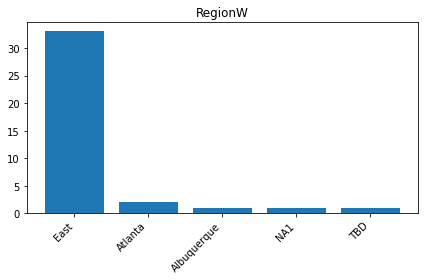

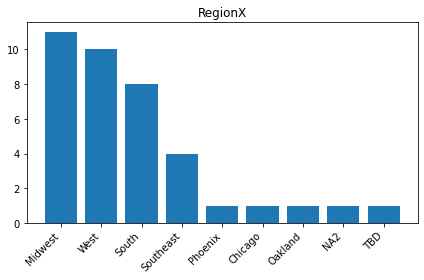

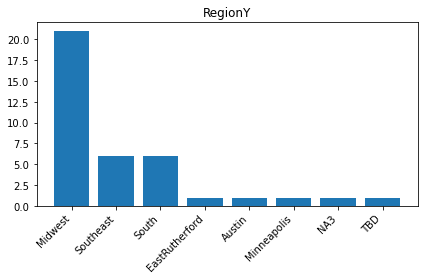

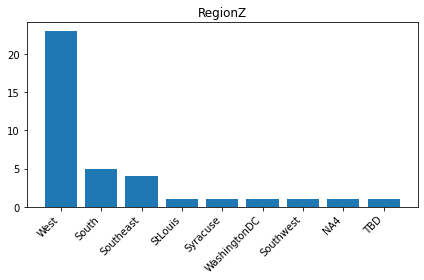

In [152]:
for col in ['RegionW', 'RegionX', 'RegionY', 'RegionZ']:
    plt.figure()
    df = pd.DataFrame(seasons[col].value_counts())
    plt.bar(df.index, df[col])
    plt.title(col)
    plt.xticks(rotation=45, ha='right')

East Region is crushing it! Lets go UCONN! Though its unlikely Uconn as they're at the end of the alphabet...remember W,X,Y,Z are determined based on whichever team comes first alphabetically. 

Note: it'll be interesting to see the distribution on what teams are claiming their conference the most.

Besides the excitement, what does NA# and TBD tell us?

In [103]:
seasons[seasons['RegionZ'] == 'NA4']

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
35,2020,2019-11-04 00:00:00,NA1,NA2,NA3,NA4


In [105]:
seasons[seasons['RegionZ'] == 'TBD']

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
37,2022,2021-11-01 00:00:00,TBD,TBD,TBD,TBD


Good find, NA shows information regarding the 2020 tournament which didn't happen. TBD is for this years tournament which hasn't happened yet.

As we can see below, all data was shown on the above charts so there is no need to eleminate these (yet) to capture more relevant data. 

In [106]:
seasons['RegionZ'].value_counts()

West            23
South            5
Southeast        4
StLouis          1
Syracuse         1
WashingtonDC     1
Southwest        1
NA4              1
TBD              1
Name: RegionZ, dtype: int64

### Tourney Seeds

In [107]:
tourney_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [111]:
tourney_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  2354 non-null   int64 
 1   Seed    2354 non-null   object
 2   TeamID  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


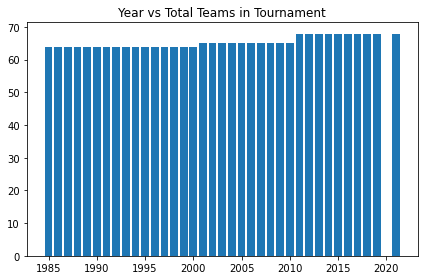

In [155]:
plt.bar(tourney_seeds['Season'].unique(), pd.DataFrame(tourney_seeds['Season'].value_counts()).sort_index()['Season'])
plt.title('Year vs Total Teams in Tournament');

As in most sports we can see the expansion over the years bringing the excitement to the people!

I dont see any cleaning that needs to be done in this dataframe. 

### Regular Season Compact Results

In [157]:
reg_season_compact_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


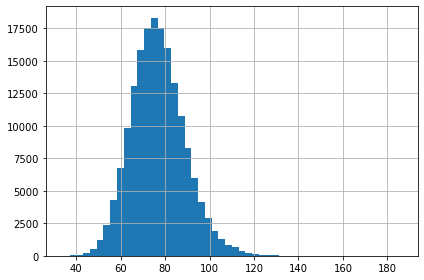

In [161]:
reg_season_compact_results['WScore'].hist(bins=50);

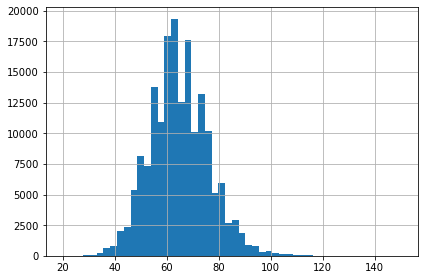

In [163]:
reg_season_compact_results['LScore'].hist(bins=50);

Wow, imagine only putting up 34 points in a game and winning! Also, 186 points is impressive.

### Tournament Compact Results

In [181]:
tourney_compact_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


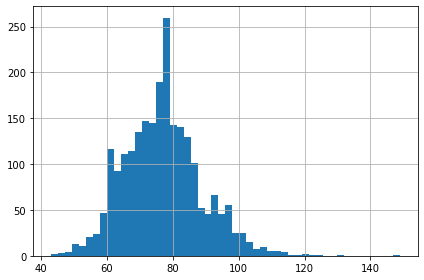

In [184]:
tourney_compact_results['WScore'].hist(bins=50);

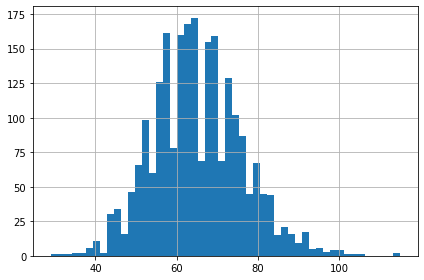

In [217]:
tourney_compact_results['LScore'].hist(bins=50);

In [197]:
print('Regular Season')
print(f"Average Winning Score: {round(reg_season_compact_results['WScore'].mean(), 2)}")
print(f"Standard Deviation for Winning Score: {round(reg_season_compact_results['WScore'].std(), 2)}")
print('')
print('NCAA Tournament')
print(f"Average Winning Score: {round(tourney_compact_results['WScore'].mean(), 2)}")
print(f"Standard Deviation for Winning Score: {round(tourney_compact_results['WScore'].std(), 2)}")
print('')
print('Regular Season')
print(f"Average Losing Score: {round(reg_season_compact_results['LScore'].mean(), 2)}")
print(f"Standard Deviation for Losing Score: {round(reg_season_compact_results['LScore'].std(), 2)}")
print('')
print('NCAA Tournament')
print(f"Average Losing Score: {round(tourney_compact_results['LScore'].mean(), 2)}")
print(f"Standard Deviation for Losing Score: {round(tourney_compact_results['LScore'].std(), 2)}")
print('')
print('='*64)
print('')
print('Winning Vs Losing Scores')
print('')
print('Regular Season')
print(f"The most points in a win is: {max(reg_season_compact_results['WScore'])}")
print(f"The most points in a loss is: {max(reg_season_compact_results['LScore'])}")
print('')
print('NCAA Tournament')
print(f"The most points in a win is: {max(tourney_compact_results['WScore'])}")
print(f"The most points in a loss is: {max(tourney_compact_results['LScore'])}")
print('')
print('Regular Season')
print(f"The least points in a win is: {min(reg_season_compact_results['WScore'])}")
print(f"The least points in a loss is: {min(reg_season_compact_results['LScore'])}")
print('')
print('NCAA Tournament')
print(f"The least points in a win is: {min(tourney_compact_results['WScore'])}")
print(f"The least points in a loss is: {min(tourney_compact_results['LScore'])}")

Regular Season
Average Winning Score: 76.76
Standard Deviation for Winning Score: 11.96

NCAA Tournament
Average Winning Score: 76.89
Standard Deviation for Winning Score: 11.84

Regular Season
Average Losing Score: 64.66
Standard Deviation for Losing Score: 11.28

NCAA Tournament
Average Losing Score: 65.17
Standard Deviation for Losing Score: 11.06


Winning Vs Losing Scores

Regular Season
The most points in a win is: 186
The most points in a loss is: 150

NCAA Tournament
The most points in a win is: 149
The most points in a loss is: 115

Regular Season
The least points in a win is: 34
The least points in a loss is: 20

NCAA Tournament
The least points in a win is: 43
The least points in a loss is: 29


Interesting comparison, you can see the average score is slightly higher with a tighter standard deviation for both winning and losing scores. I'm surprised by the low points during the NCAA tournament.

All of the tournament games have been played at a neutral facility. How big of an impact do home games have during the regular season?

The winner win's at home 59.0% of the time including neutral sites


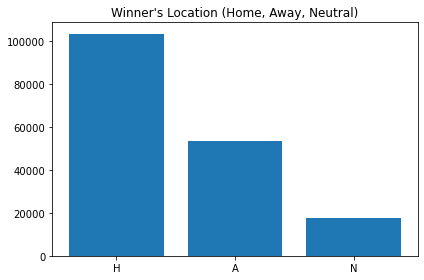

In [215]:
df = pd.DataFrame(reg_season_compact_results['WLoc'].value_counts())
plt.bar(df.index, df['WLoc'])
plt.title("Winner's Location (Home, Away, Neutral)");
print(f"The winner win's at home {round(df['WLoc'][0]/df['WLoc'].sum(), 2) * 100}% of the time including neutral sites")

### Regular Season Detailed Results

In [219]:
reg_season_detailed_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [226]:
reg_season_detailed_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100423 entries, 0 to 100422
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   100423 non-null  int64 
 1   DayNum   100423 non-null  int64 
 2   WTeamID  100423 non-null  int64 
 3   WScore   100423 non-null  int64 
 4   LTeamID  100423 non-null  int64 
 5   LScore   100423 non-null  int64 
 6   WLoc     100423 non-null  object
 7   NumOT    100423 non-null  int64 
 8   WFGM     100423 non-null  int64 
 9   WFGA     100423 non-null  int64 
 10  WFGM3    100423 non-null  int64 
 11  WFGA3    100423 non-null  int64 
 12  WFTM     100423 non-null  int64 
 13  WFTA     100423 non-null  int64 
 14  WOR      100423 non-null  int64 
 15  WDR      100423 non-null  int64 
 16  WAst     100423 non-null  int64 
 17  WTO      100423 non-null  int64 
 18  WStl     100423 non-null  int64 
 19  WBlk     100423 non-null  int64 
 20  WPF      100423 non-null  int64 
 21  LFGM     1

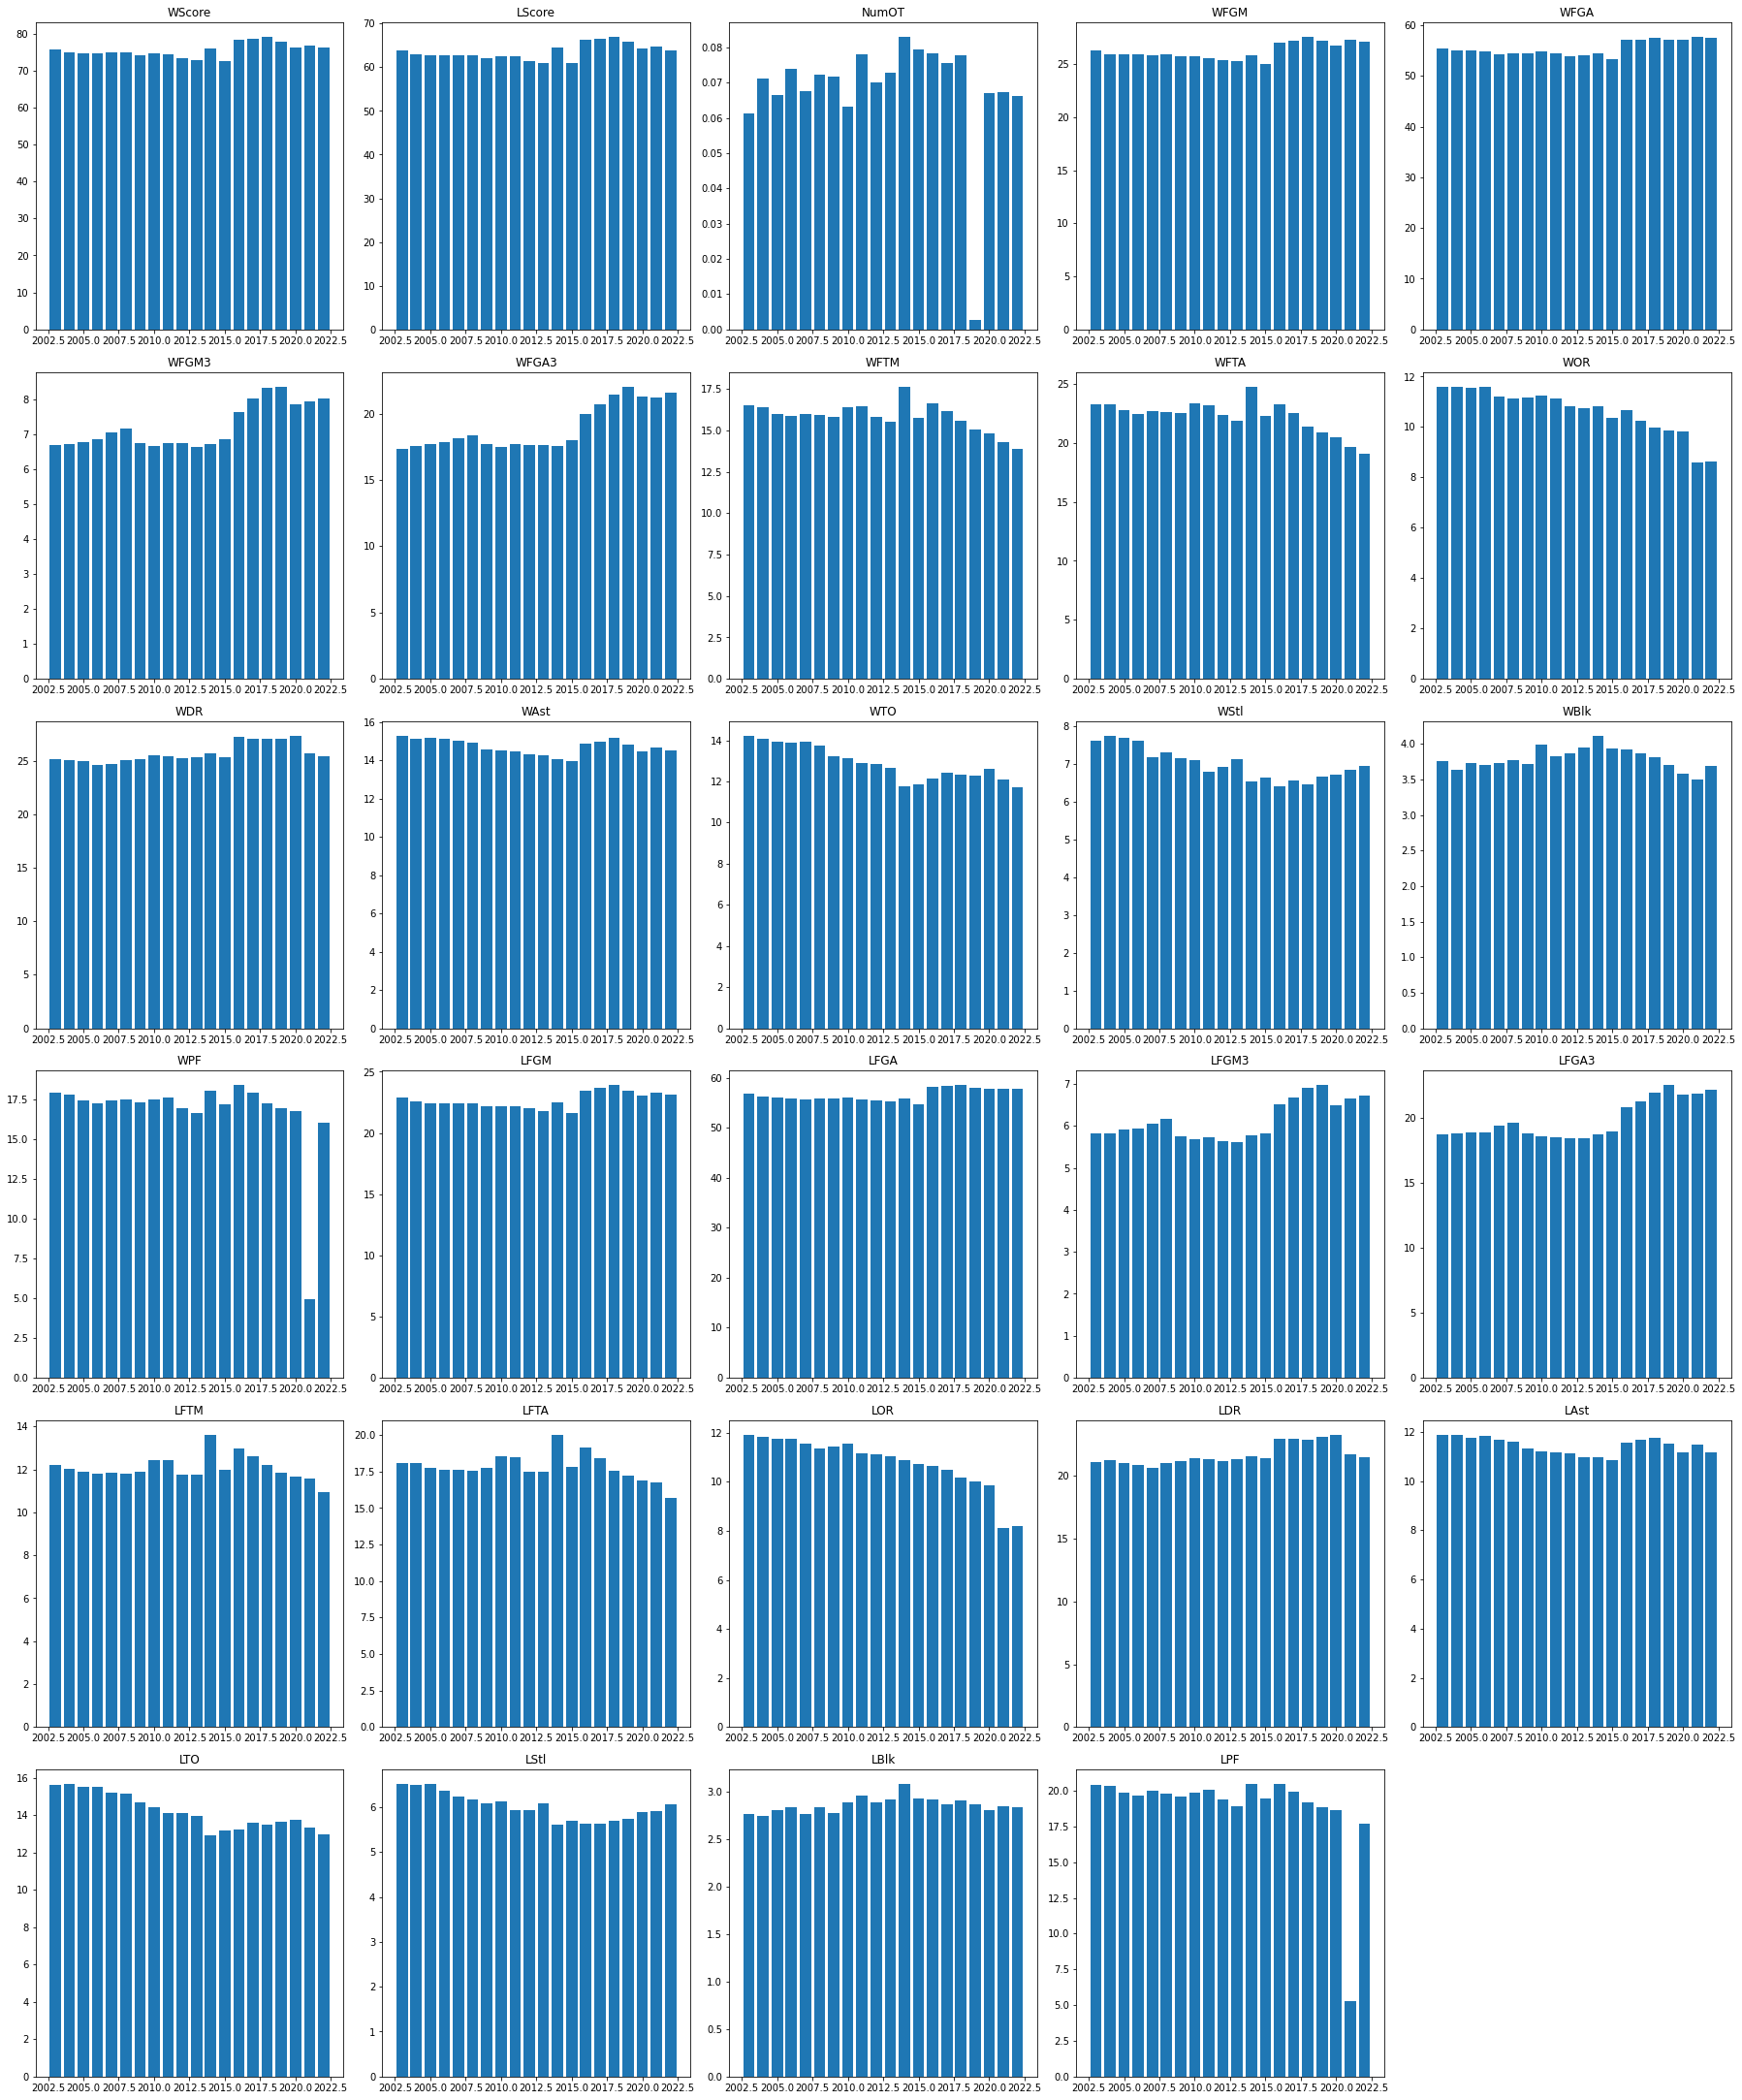

In [243]:
wanted_cols = reg_season_detailed_results.drop(['DayNum', 'WTeamID', 'LTeamID'], axis=1).groupby('Season').mean()

x=1
fig = plt.figure(figsize=(25, 75))
for col in wanted_cols:
    fig.add_subplot(15,5,x)
    plt.title(col)
    plt.bar(wanted_cols.index, wanted_cols[col])
    x += 1

### Tourney Detailed Results

In [245]:
tourney_detailed_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [246]:
tourney_detailed_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   1181 non-null   int64 
 1   DayNum   1181 non-null   int64 
 2   WTeamID  1181 non-null   int64 
 3   WScore   1181 non-null   int64 
 4   LTeamID  1181 non-null   int64 
 5   LScore   1181 non-null   int64 
 6   WLoc     1181 non-null   object
 7   NumOT    1181 non-null   int64 
 8   WFGM     1181 non-null   int64 
 9   WFGA     1181 non-null   int64 
 10  WFGM3    1181 non-null   int64 
 11  WFGA3    1181 non-null   int64 
 12  WFTM     1181 non-null   int64 
 13  WFTA     1181 non-null   int64 
 14  WOR      1181 non-null   int64 
 15  WDR      1181 non-null   int64 
 16  WAst     1181 non-null   int64 
 17  WTO      1181 non-null   int64 
 18  WStl     1181 non-null   int64 
 19  WBlk     1181 non-null   int64 
 20  WPF      1181 non-null   int64 
 21  LFGM     1181 non-null   int64 
 22  

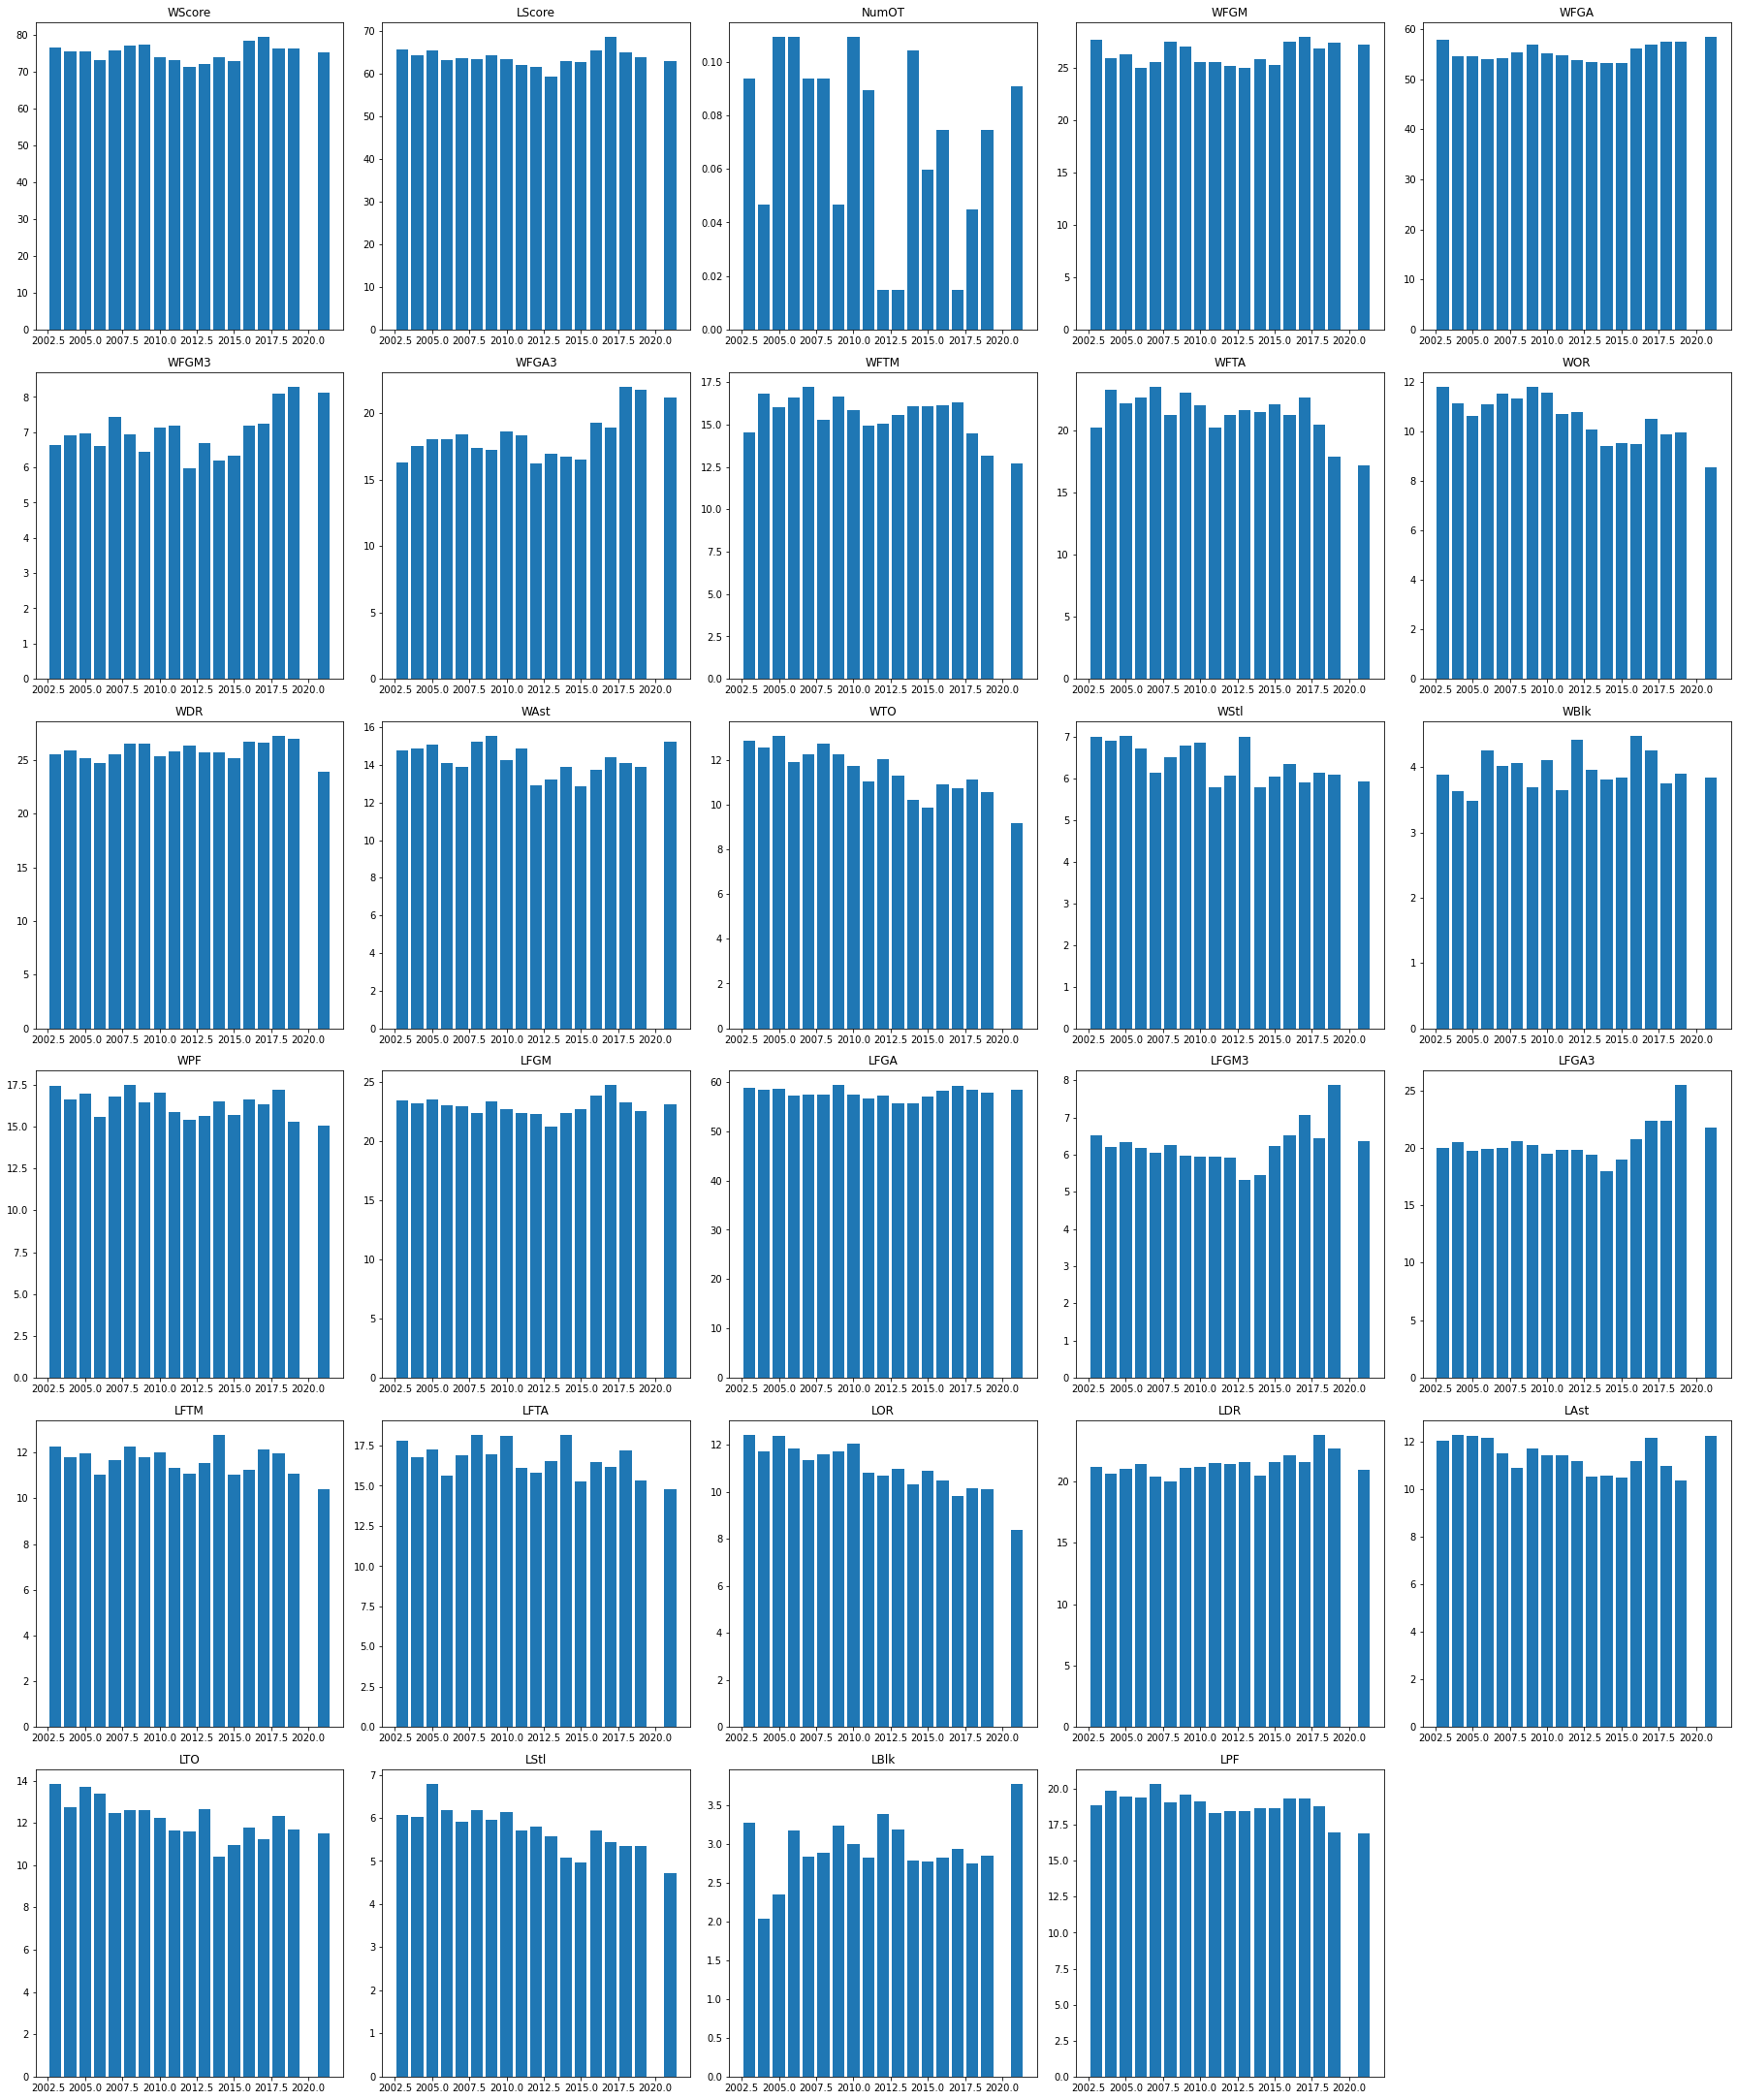

In [247]:
wanted_cols = tourney_detailed_results.drop(['DayNum', 'WTeamID', 'LTeamID'], axis=1).groupby('Season').mean()

x=1
fig = plt.figure(figsize=(25, 75))
for col in wanted_cols:
    fig.add_subplot(15,5,x)
    plt.title(col)
    plt.bar(wanted_cols.index, wanted_cols[col])
    x += 1

### Cities

During Feature Engineering we will at latitude, longitude, and (hopefully) elevation. It'd be interesting to see how much of an impact this will have on our model. 

In [250]:
cities.head()

,CityID,City,State
0,4001,Abilene,TX
1,4002,Akron,OH
2,4003,Albany,NY
3,4004,Albuquerque,NM
4,4005,Allentown,PA


### Game Cities

In [252]:
game_cities.head()

,Season,DayNum,WTeamID,LTeamID,CRType,CityID
0,2010,7,1143,1293,Regular,4027
1,2010,7,1314,1198,Regular,4061
2,2010,7,1326,1108,Regular,4080
3,2010,7,1393,1107,Regular,4340
4,2010,9,1143,1178,Regular,4027


In [253]:
game_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67846 entries, 0 to 67845
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   67846 non-null  int64 
 1   DayNum   67846 non-null  int64 
 2   WTeamID  67846 non-null  int64 
 3   LTeamID  67846 non-null  int64 
 4   CRType   67846 non-null  object
 5   CityID   67846 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 3.1+ MB


In [254]:
game_cities['CRType'].value_counts()

Regular      66349
Secondary      764
NCAA           733
Name: CRType, dtype: int64

### Massey Ordinals

# This is going to need further investigation into what exactly OrdinalRank denotes and how it can bring value

In [256]:
massey_ordinals.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


In [257]:
massey_ordinals['SystemName'].value_counts()

SAG    122047
MOR    121057
POM    118566
DOK    105270
WLK     97047
        ...  
CRW       351
HRN       351
PMC       351
BP5       345
PH        326
Name: SystemName, Length: 187, dtype: int64

### Team Coaches

In [258]:
team_coaches.head()

,Season,TeamID,FirstDayNum,LastDayNum,CoachName
0,1985,1102,0,154,reggie_minton
1,1985,1103,0,154,bob_huggins
2,1985,1104,0,154,wimp_sanderson
3,1985,1106,0,154,james_oliver
4,1985,1108,0,154,davey_whitney


In [259]:
team_coaches['FirstDayNum'].value_counts()

0     12309
95        6
67        6
70        5
31        5
      ...  
77        1
21        1
79        1
61        1
62        1
Name: FirstDayNum, Length: 67, dtype: int64

### Conference

In [260]:
conf.head()

,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference
3,acc,Atlantic Coast Conference
4,aec,America East Conference


### Team Conference

In [261]:
team_conf.head()

,Season,TeamID,ConfAbbrev
0,1985,1102,wac
1,1985,1103,ovc
2,1985,1104,sec
3,1985,1106,swac
4,1985,1108,swac


### Conference Tourney Games

In [262]:
conf_tourney_games.head()

,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2001,a_sun,121,1194,1144
1,2001,a_sun,121,1416,1240
2,2001,a_sun,122,1209,1194
3,2001,a_sun,122,1359,1239
4,2001,a_sun,122,1391,1273


### Secondary Tourney Teams & Secondary Tourney Compact Reults

#### Leave this for a later date

In [263]:
secondary_tourney_teams = pd.read_csv('MSecondaryTourneyTeams.csv')
secondary_tourney_compact_results = pd.read_csv('MSecondaryTourneyTeams.csv')

### Team Spellings

#### We will use this if we add external data

team_spellings = pd.read_csv('MTeamSpellings.csv', encoding='cp1252')

### Tourney Slots

In [266]:
tourney_slots

,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12
...,...,...,...,...
2313,2021,R6CH,R5WX,R5YZ
2314,2021,W11,W11a,W11b
2315,2021,W16,W16a,W16b
2316,2021,X11,X11a,X11b


### Tourney Seed Round Slots

In [267]:
tourney_seed_round_slots

,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
0,W01,1,R1W1,136,137
1,W01,2,R2W1,138,139
2,W01,3,R3W1,143,144
3,W01,4,R4W1,145,146
4,W01,5,R5WX,152,152
...,...,...,...,...,...
715,Z16b,2,R2Z1,138,139
716,Z16b,3,R3Z1,143,144
717,Z16b,4,R4Z1,145,146
718,Z16b,5,R5YZ,152,152


In [ ]:
Data Cleaning:
    * Season: Remove NA4 and TBD 
    * Regular Season Compact Results - convert WTeamID and LTeamID to team names
    * Add coordinates and elevation to cities
    * Remove secondary game_cities from dataset? 